# Model Building

In [30]:
import numpy as nр

import pandas as pd

import os

import tensorflow as tf

import tensorflow.keras as keras

from keras import Model

from keras.applications.densenet import DenseNet121

from keras.applications import vgg16 

from keras.preprocessing import image

from keras.applications.densenet import preprocess_input, decode_predictions

from keras.layers import GlobalMaxPooling2D

#from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt



import matplotlib.image as mpimg

import cv2

import pathlib
from sklearn.metrics.pairwise import linear_kernel



In [2]:
data = pd.read_csv("D:\\AI Stylish Project\\fashion_dataset\\styles.csv",on_bad_lines='skip')
data

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,Unnamed: 10,Unnamed: 11
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,NaN,NaN
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,NaN,NaN
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,NaN,NaN
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,NaN,NaN
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
44441,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,NaN,NaN
44442,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,NaN,NaN
44443,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,NaN,NaN
44444,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,NaN,NaN


In [3]:
path = 'D:\\AI Stylish Project\\fashion_dataset\\'
dataset_path = pathlib.Path(path)
dirs_names = os.listdir(dataset_path) #list content of dataset
dirs_names

['images', 'styles.csv']

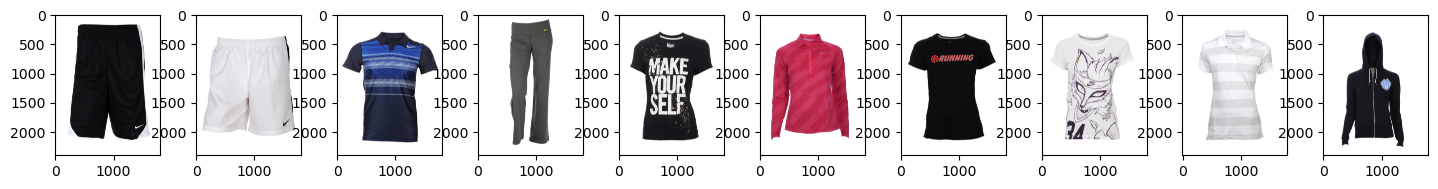

In [4]:
#plot sample
plt.figure(figsize=(20,20))
for i in range(20,30):
    plt.subplot(6, 10, i-10+1)
    cloth_img = mpimg.imread(path + 'images/100' + str(i) +'.jpg') #Assign image ids
    plt.imshow(cloth_img)
plt.subplots_adjust(wspace=-0.5, hspace=1)
plt.show()

In [5]:
styles_df = pd.read_csv(path + "styles.csv", nrows=35000, on_bad_lines='skip')
styles_df['image'] = styles_df.apply(lambda x: str(x['id']) + ".jpg", axis=1)
print(styles_df.shape)
styles_df.head()


(35000, 13)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,Unnamed: 10,Unnamed: 11,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,NaN,NaN,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,NaN,NaN,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,NaN,NaN,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,NaN,NaN,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,NaN,NaN,53759.jpg


# Modeling and Get Image Embeddings

In [6]:
img_width, img_height, chnls = 100, 100, 3

In [7]:
#VGG16
from tensorflow.keras.applications import VGG16

vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(img_width, img_height, chnls))
vgg16_model = keras.Sequential([vgg16, GlobalMaxPooling2D()])
vgg16_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 global_max_pooling2d (Glob  (None, 512)               0         
 alMaxPooling2D)                                                 
                                                                 
Total params: 14714688 (56.13 MB)
Trainable params: 14714688 (56.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
def img_path(img):
    """ Take image name(id) and return the complete path of it """
    return path + 'images//' + img
def predict(model, img_name):
    """ Load and preprocess image then make prediction """
    # Reshape
    img = image.load_img(img_path(img_name), target_size=(img_width,img_height))
    #img to Array
    img = image.img_to_array(img)
    #Expand Dim (1, w, h)
    img = np.expand_dims(img, axis=0)
    #Pre Process Input
    img = preprocess_input(img)
    return model.predict(img)

In [9]:
from numpy import *
import numpy as np

In [10]:
def get_embeddings(df, model):
    """ Return a data """
    df_copy = df
    df_embeddings = df_copy['image'].apply(lambda x: predict(vgg16_model, x).reshape(-1))
    df_embeddings = df_embeddings.apply(pd.Series)
    return df_embeddings
df_embeddings = get_embeddings(styles_df, vgg16_model)

1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 86ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 98ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 96ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 107ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 97ms/step


1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 86ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 115ms/step


1/1 [==============================] - 0s 98ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 61ms/step


In [18]:
df_embeddings

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.000000,0.0,0.000000,0.000000,0.144590,0.000000,0.000000,0.0,0.0,0.000000,...,0.262174,3.153265,0.000000,0.000000,3.582392,0.093602,0.000000,0.000000,0.403043,3.082345
1,0.214865,0.0,0.642268,0.000000,0.721052,0.000000,0.961314,0.0,0.0,0.000000,...,0.972879,3.489842,0.444948,1.035509,4.321327,0.276158,0.657144,1.072056,0.752608,2.018365
2,1.869815,0.0,0.000000,0.000000,0.445198,0.000000,0.000000,0.0,0.0,0.000000,...,0.895739,0.185554,0.671142,0.076805,0.000000,0.400542,0.000000,0.000000,0.968235,0.000000
3,0.067576,0.0,0.000000,0.000000,0.598628,0.000000,0.206587,0.0,0.0,0.000000,...,1.043816,2.009497,0.382333,0.000000,1.067552,0.187986,0.000000,0.000000,0.145138,3.934354
4,0.000000,0.0,0.000000,0.000000,0.090579,0.164340,0.000000,0.0,0.0,0.000000,...,0.535294,0.341517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.115651,1.671086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,0.000000,0.0,0.677849,0.016529,0.668631,0.194027,0.000000,0.0,0.0,2.863809,...,1.382595,0.000000,1.570213,0.000000,0.073837,1.128696,0.162642,0.000000,0.824420,0.000000
34996,0.234846,0.0,0.000000,0.000000,2.249116,0.000000,3.023177,0.0,0.0,0.000000,...,1.215666,0.453736,0.416167,0.000000,0.511836,0.643683,0.000000,1.093648,1.167980,0.126776
34997,2.599421,0.0,1.160533,1.247970,0.584911,0.000000,2.632468,0.0,0.0,3.307110,...,1.183079,0.000000,0.251376,0.002228,0.934156,0.023098,0.857113,0.000000,0.978986,0.000000
34998,0.013037,0.0,0.043465,0.000000,0.835939,0.000000,0.568323,0.0,0.0,0.000000,...,0.810870,2.394754,0.359223,0.000000,1.320390,0.262715,0.229523,0.083708,0.637590,2.058080


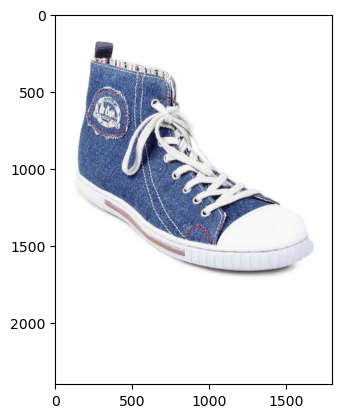

In [19]:
# http://assets.myntassets.com/v1/images/style/properties/7a5b82d1372a7a5c6de67ae7a314fd91_images.jpg

url="D:\\Fashion Dataset Group-9\\fashion-dataset\\images\\2828.jpg"
a = plt.imread(url)
plt.imshow(a)

In [20]:
sample_image = predict(vgg16_model, '2828.jpg')
sample_image.shape

1/1 [==============================] - 0s 360ms/step


(1, 512)

In [21]:
df_sample_image = pd.DataFrame(sample_image)
print(df_sample_image)

   0         1        2         3        4    5    6    7         8    \
0  0.0  0.157108  1.28547  0.471513  0.55693  0.0  0.0  0.0  0.413917   

        9    ...       502  503       504       505       506       507  508  \
0  4.703327  ...  1.918839  0.0  0.651223  0.557057  1.481971  1.058189  0.0   

        509       510  511  
0  0.773304  1.393124  0.0  

[1 rows x 512 columns]


In [22]:
sample_similarity = linear_kernel(df_sample_image, df_embeddings)
print(sample_similarity)

[[321.88406 362.56406 285.92685 ... 447.04462 332.17435 432.66345]]


In [26]:
def get_similarity(model):
    """ Get similarity of custom image """
    sample_image = predict(vgg16_model, '1542.jpg')
    df_sample_image = pd.DataFrame(sample_image)
    sample_similarity = linear_kernel(df_sample_image, df_embeddings)
    return sample_similarity
    

Steps in normalize_sim Calculate the Minimum and Maximum Values: For each row in the similarity matrix, find the minimum and maximum values.

Normalize the Values: Rescale each value in the row to a range between 0 and 1 using the formula:

\text{norm} = \frac{\text{similarity} - \text{x_min}}{\text{x_max} - \text{x_min}}

In [27]:
def normalize_sim(similarity):
    """ Normalize similarity results """
    x_min = similarity.min(axis=1)
    x_max = similarity.max(axis=1)
    norm = (similarity-x_min)/(x_max-x_min)[:, np.newaxis]
    return norm
sample_similarity_norm = normalize_sim(sample_similarity)
sample_similarity_norm.shape

(1, 35000)

In [28]:
def get_recommendations(df, similarity):
        """ Return the top 5 most similar products """
    
        # Get the pairwise similarity scores of all clothes with that one(index, value)
        sim_scores = list(enumerate(similarity[0]))
    
        #Sort the clothes based on the similairty scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        
        #Get the scores of the 5 most similar clothes
        sim_scores = sim_scores[0:5]
        print(sim_scores)
        
        #Get the clothes indicies
        cloth_indices = [i[0] for i in sim_scores]
        
        #Return the top 5 most similar products
        return df['image'].iloc[cloth_indices]

[(14079, 1.0), (5791, 0.9966607), (28619, 0.995608), (26073, 0.98419046), (1840, 0.96078926)]


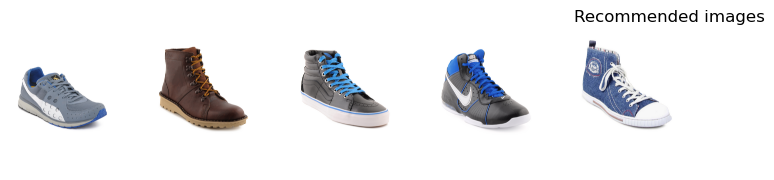

In [32]:
recommendation = get_recommendations(styles_df, sample_similarity_norm)
recommendation_list = recommendation.to_list()
#recommended images
plt.figure(figsize=(20,20))
j=0
for i in recommendation_list:
    plt.subplot(6, 10, j+1)
    cloth_img = mpimg.imread(path + 'images/'+ i)
    plt.imshow(cloth_img)
    plt.axis("off")
    j+=1
plt.title("Recommended images", loc='left')
plt.subplots_adjust(wspace=-0.5, hspace=1)
plt.show()